In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [36]:
im = cv.imread(filename='./data/napoleon.png') # read an image from a given path
print('Napoleon.png')
print(type(im)) # <class 'numpy.ndarray'>
print(f'Shape: {im.shape}') # (368, 445, 3)
print(f'dtype: {im.dtype}') # uint 8
print(f'Max intensity value: {np.max(im)}, Min intensity value: {np.min(im)}') 

Napoleon.png
<class 'numpy.ndarray'>
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 254, Min intensity value: 0


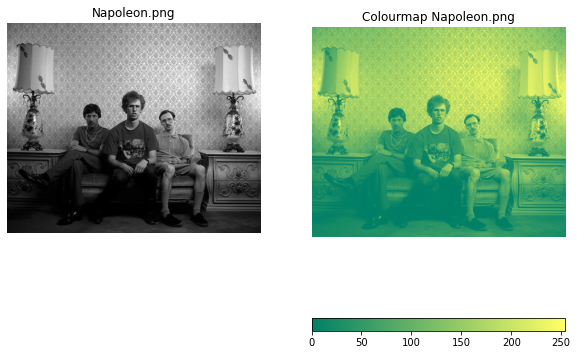

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10)) # create a figure and axis objects

ax1.axis('off')
ax1.set_title('Napoleon.png')
implot = ax1.imshow(im)

ax2.axis('off')
ax2.set_title('Colourmap Napoleon.png')
implot = ax2.imshow(im[:,:,0], cmap=cm.summer) # colour mapping only makes sense when working with a single channel
fig.colorbar(implot, orientation='horizontal') # add colourbar to axis of choice

plt.show() # show figure

In [38]:
cv.imwrite(filename='./data/my_napoleon.png', img=im) # save an image to a given path
fig.savefig(fname='./data/napoleon_figure.png') # save a figure to a given path

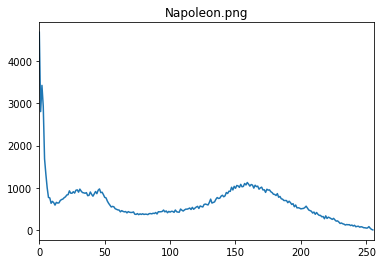

Napoleon_light.png
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 230, Min intensity value: 103


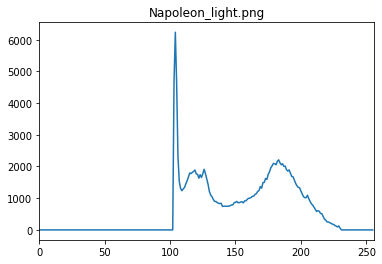

Napoleon_dark.png
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 152, Min intensity value: 25


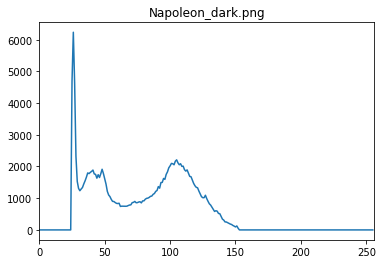

In [39]:
hist = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon.png')
plt.show()

im_light = cv.imread(filename='./data/napoleon_light.png')
print('Napoleon_light.png')
print(f'Shape: {im_light.shape}')
print(f'dtype: {im_light.dtype}')
print(f'Max intensity value: {np.max(im_light)}, Min intensity value: {np.min(im_light)}') 

hist = cv.calcHist(images=[im_light], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon_light.png')
plt.show()

im_dark = cv.imread(filename='./data/napoleon_dark.png')
print('Napoleon_dark.png')
print(f'Shape: {im_dark.shape}')
print(f'dtype: {im_dark.dtype}')
print(f'Max intensity value: {np.max(im_dark)}, Min intensity value: {np.min(im_dark)}') 

hist = cv.calcHist(images=[im_dark], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon_dark.png')
plt.show()

In [40]:
# Division of a numpy array of dtype = uint8 by an integer to assess whether it keeps the precision
division_im = (im/64)*64
if np.array_equal(a1=im, a2=division_im):
    print('The division of an uint8 value by an integer keeps the precision.')
else:
    print('The division of an uint8 value by an integer does NOT keep the precision.')

The division of an uint8 value by an integer keeps the precision.


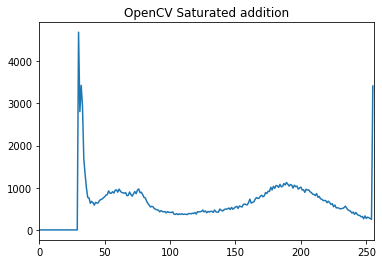

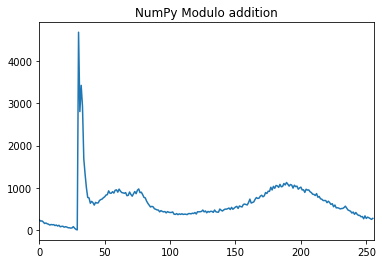

In [41]:
im_bright = cv.add(im,30)
hist = cv.calcHist(images=[im_bright], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('OpenCV Saturated addition')
plt.xlim([0,256])
plt.show()

im_bright = im + 30
hist = cv.calcHist(images=[im_bright], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('NumPy Modulo addition')
plt.xlim([0,256])
plt.show()

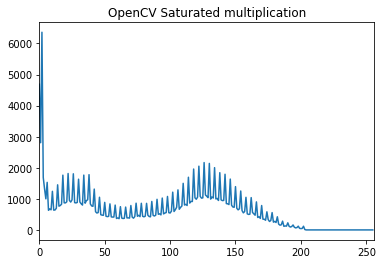

In [42]:
im_lowerContrast = cv.multiply(im, 0.8) # Element-wise multiplication
hist = cv.calcHist(images=[im_lowerContrast], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('OpenCV Saturated multiplication')
plt.xlim([0,256])
plt.show()

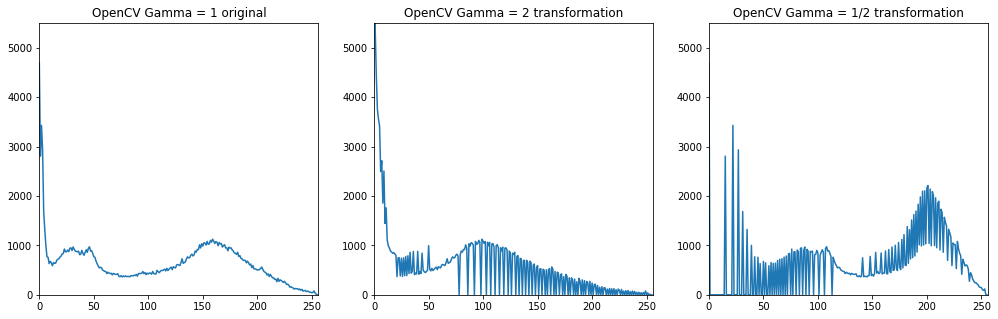

In [43]:
def gamma_transf(image, gamma):
    lookUpTable = np.empty(shape=(1,256), dtype=np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(np.power(i / 255.0, gamma) * 255.0, 0, 255) # Gamma transformation
    return cv.LUT(im, lookUpTable) # performs a look-up table transform of an array

im_gamma05 = gamma_transf(im, gamma=0.5)
im_gamma2 = gamma_transf(im, gamma=2)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
hist = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
imhist = ax0.plot(hist)
ax0.set_title('OpenCV Gamma = 1 original')
ax0.set_xlim([0,256])
ax0.set_ylim([0,5500])

hist = cv.calcHist(images=[im_gamma2], channels=[0], mask=None, histSize=[256], ranges=[0,256])
imhist = ax1.plot(hist)
ax1.set_title('OpenCV Gamma = 2 transformation')
ax1.set_xlim([0,256])
ax1.set_ylim([0,5500])

hist = cv.calcHist(images=[im_gamma05], channels=[0], mask=None, histSize=[256], ranges=[0,256])
imhist = ax2.plot(hist)
ax2.set_title('OpenCV Gamma = 1/2 transformation')
ax2.set_xlim([0,256])
ax2.set_ylim([0,5500])

plt.show()

(0.0, 5500.0)

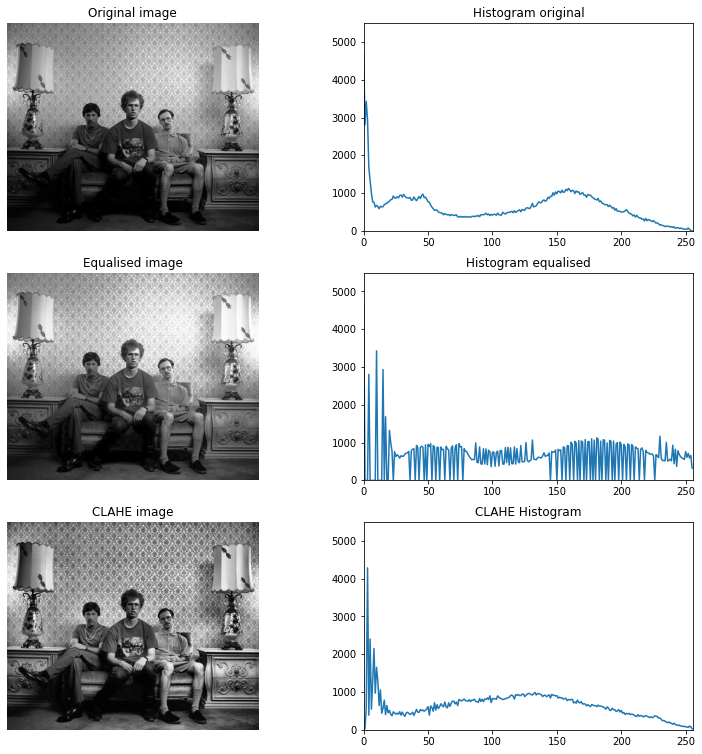

In [44]:
hist_original = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
equalised_im = cv.equalizeHist(im[:,:,0]) # histogram equalisation of Blue channel
hist_equalised = cv.calcHist(images=[equalised_im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # contrast limiting adaptive histogram equalization (CLAHE) object
clahe_im = clahe.apply(im[:,:,0]) # CLAHE of Blue channel
hist_clahe = cv.calcHist(images=[clahe_im], channels=[0], mask=None, histSize=[256], ranges=[0,256])

fig, [(ax0, ax1), (ax2, ax3), (ax4, ax5)] = plt.subplots(nrows=3, ncols=2, figsize=(13,13))
imhist = ax0.imshow(im)
ax0.axis('off')
ax0.set_title('Original image')

imhist = ax1.plot(hist_original)
ax1.set_title('Histogram original')
ax1.set_xlim([0,256])
ax1.set_ylim([0,5500])

imhist = ax2.imshow(equalised_im, cmap=cm.gray)
ax2.axis('off')
ax2.set_title('Equalised image')

imhist = ax3.plot(hist_equalised)
ax3.set_title('Histogram equalised')
ax3.set_xlim([0,256])
ax3.set_ylim([0,5500])

imhist = ax4.imshow(clahe_im, cmap=cm.gray)
ax4.axis('off')
ax4.set_title('CLAHE image')

imhist = ax5.plot(hist_clahe)
ax5.set_title('CLAHE Histogram')
ax5.set_xlim([0,256])
ax5.set_ylim([0,5500])

Shape of Zebra.png: (512, 512, 3)
Data type: uint8


Text(0.5, 1.0, 'Bilinear, antialiasing interpolation')

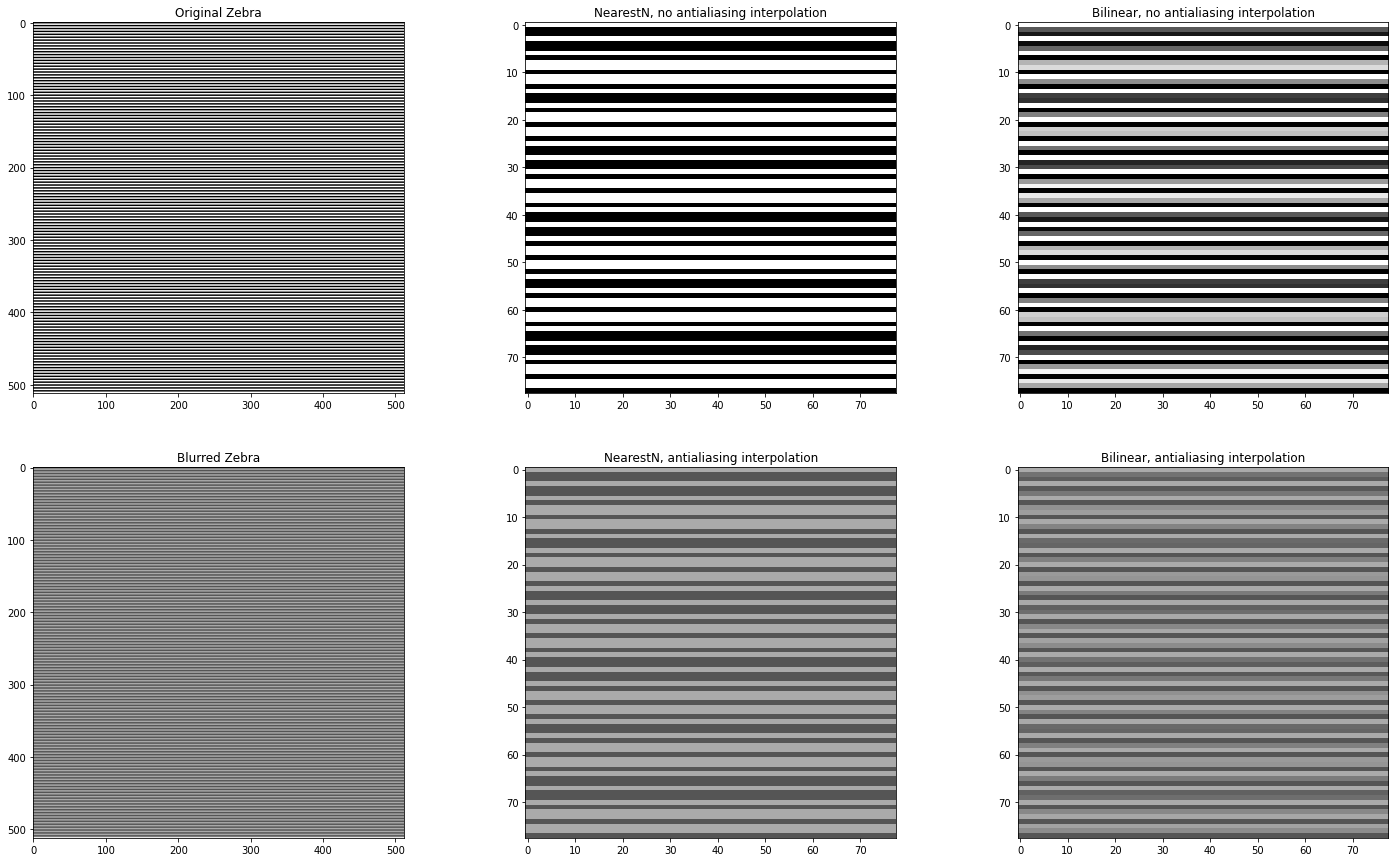

In [45]:
im = cv.imread('./data/zebra.png')
print(f'Shape of Zebra.png: {im.shape}')
print(f'Data type: {im.dtype}')

new_dim = (78,78)
im_nearestN_noAntialiasing = cv.resize(im, new_dim, interpolation=cv.INTER_NEAREST_EXACT)
im_bilinear_noAntialiasing = cv.resize(im, new_dim, interpolation=cv.INTER_LINEAR)

im_blur = cv.blur(src=im, ksize=(3,3), anchor = (-1,-1), borderType=cv.BORDER_REFLECT)

im_nearestN_antialiasing = cv.resize(im_blur, new_dim, interpolation=cv.INTER_NEAREST_EXACT)
im_bilinear_antialiasing = cv.resize(im_blur, new_dim, interpolation=cv.INTER_LINEAR)

fig, [(ax0, ax1, ax2),(ax3, ax4, ax5)] = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

ax0.imshow(im)
ax0.set_title('Original Zebra')
ax1.imshow(im_nearestN_noAntialiasing)
ax1.set_title('NearestN, no antialiasing interpolation')
ax2.imshow(im_bilinear_noAntialiasing)
ax2.set_title('Bilinear, no antialiasing interpolation')

ax3.imshow(im_blur)
ax3.set_title('Blurred Zebra')
ax4.imshow(im_nearestN_antialiasing)
ax4.set_title('NearestN, antialiasing interpolation')
ax5.imshow(im_bilinear_antialiasing)
ax5.set_title('Bilinear, antialiasing interpolation')

Shape of Cameraman.png: (256, 256, 3)
Data type: uint8


Text(0.5, 1.0, 'Bilinear, antialiasing interpolation')

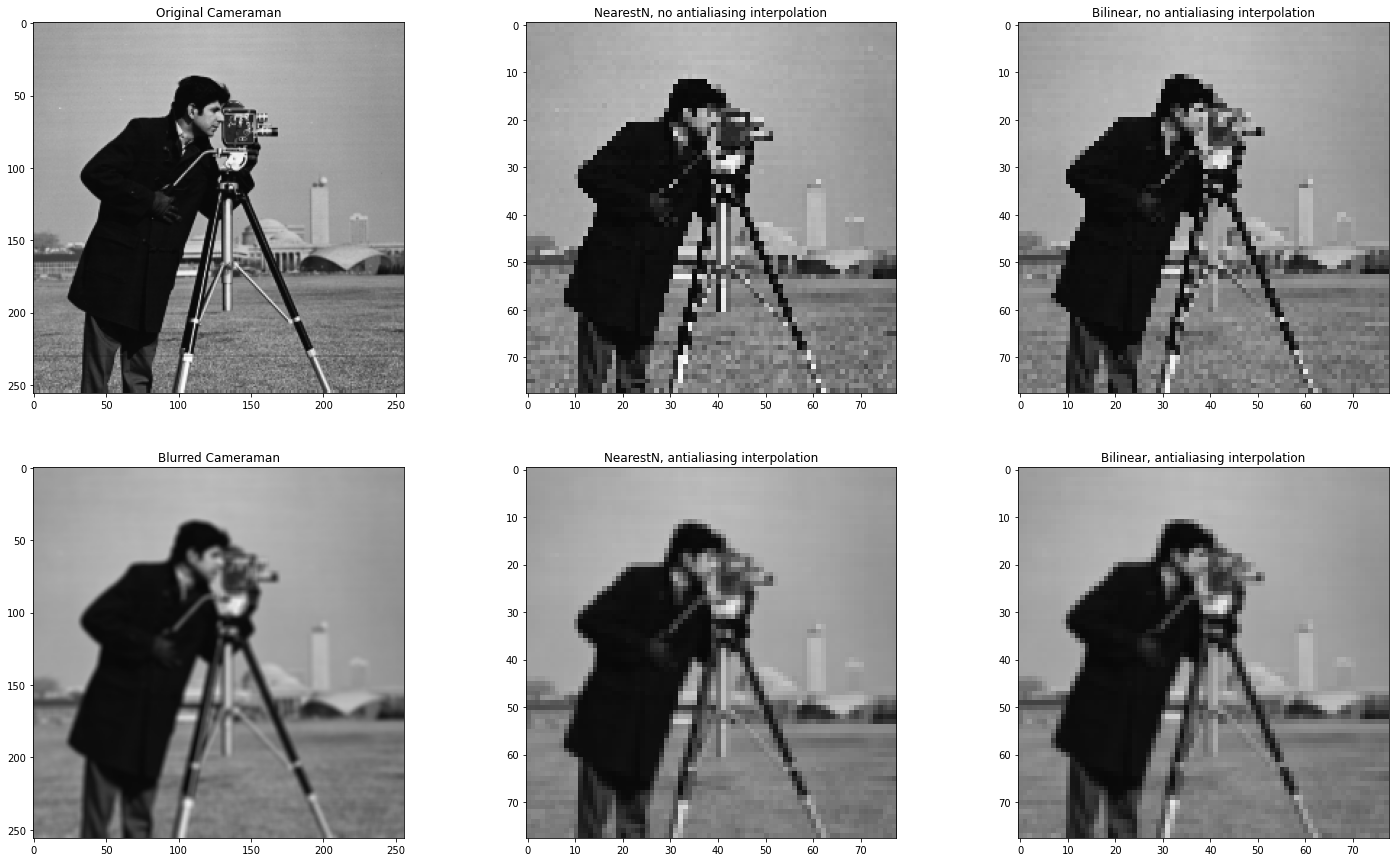

In [46]:
im = cv.imread('./data/cameraman.png')
print(f'Shape of Cameraman.png: {im.shape}')
print(f'Data type: {im.dtype}')

new_dim = (78,78)
im_nearestN_noAntialiasing = cv.resize(im, new_dim, interpolation=cv.INTER_NEAREST)
im_bilinear_noAntialiasing = cv.resize(im, new_dim, interpolation=cv.INTER_LINEAR)

im_blur = cv.GaussianBlur(src=im, ksize=(5,5), sigmaX=2, sigmaY=2, borderType=cv.BORDER_REFLECT)

im_nearestN_antialiasing = cv.resize(im_blur, new_dim, interpolation=cv.INTER_NEAREST)
im_bilinear_antialiasing = cv.resize(im_blur, new_dim, interpolation=cv.INTER_LINEAR)

fig, [(ax0, ax1, ax2),(ax3, ax4, ax5)] = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

ax0.imshow(im)
ax0.set_title('Original Cameraman')
ax1.imshow(im_nearestN_noAntialiasing)
ax1.set_title('NearestN, no antialiasing interpolation')
ax2.imshow(im_bilinear_noAntialiasing)
ax2.set_title('Bilinear, no antialiasing interpolation')

ax3.imshow(im_blur)
ax3.set_title('Blurred Cameraman')
ax4.imshow(im_nearestN_antialiasing)
ax4.set_title('NearestN, antialiasing interpolation')
ax5.imshow(im_bilinear_antialiasing)
ax5.set_title('Bilinear, antialiasing interpolation')

(-0.5, 212.5, 211.5, -0.5)

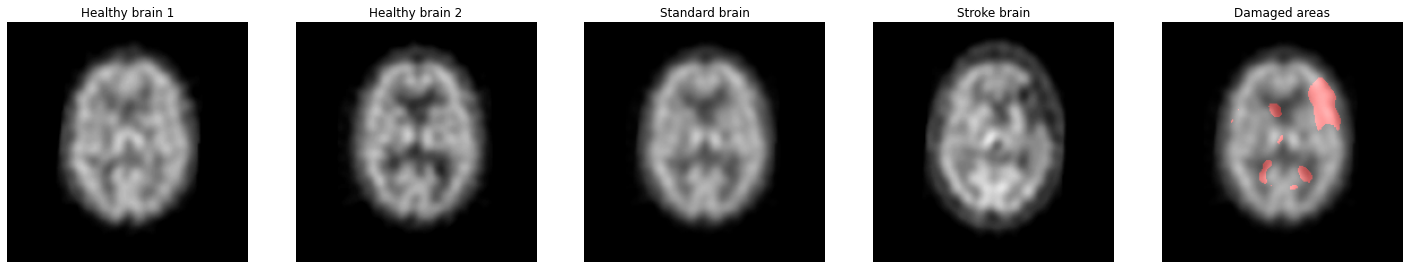

In [47]:
healthy_brain1 = cv.imread('./data/brain1.png')
healthy_brain2 = cv.imread('./data/brain2.png')
stroke_brain = cv.imread('./data/brain3.png')

standard_brain = cv.addWeighted(src1=healthy_brain1, alpha=0.5, src2= healthy_brain2, beta=0.5, gamma=0)

damaged_areas1 = cv.subtract(src1=stroke_brain, src2=standard_brain)
damaged_areas2 = cv.subtract(src1=standard_brain, src2=stroke_brain)
damaged_areas = cv.addWeighted(src1=damaged_areas1, alpha=0.5, src2=damaged_areas2, beta=0.5, gamma=0)
normalised_im = cv.divide(src1=damaged_areas, src2=int(np.max(damaged_areas)), scale=1)
damaged_areas = cv.multiply(src1=normalised_im, src2=255.0)
damaged_areas = cv.addWeighted(src1=standard_brain, alpha=0.99, src2= damaged_areas, beta=0.4, gamma=0)

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, figsize=(25,5))

ax0.imshow(healthy_brain1)
ax0.set_title('Healthy brain 1')
ax0.axis('off')
ax1.imshow(healthy_brain2)
ax1.set_title('Healthy brain 2')
ax1.axis('off')
ax2.imshow(standard_brain)
ax2.set_title('Standard brain')
ax2.axis('off')
ax3.imshow(stroke_brain)
ax3.set_title('Stroke brain')
ax3.axis('off')
ax4.imshow(damaged_areas)
ax4.set_title('Damaged areas')
ax4.axis('off')

In [48]:
def rotate_image(image, angle, interpolation):
  image_center = tuple(np.array(image.shape[:2]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, (image.shape[1],image.shape[0]), flags=interpolation)
  return result

Wrench.png shape: (134, 106, 3)


Text(0.5, 1.0, 'Rotation Bilinear Interpolation')

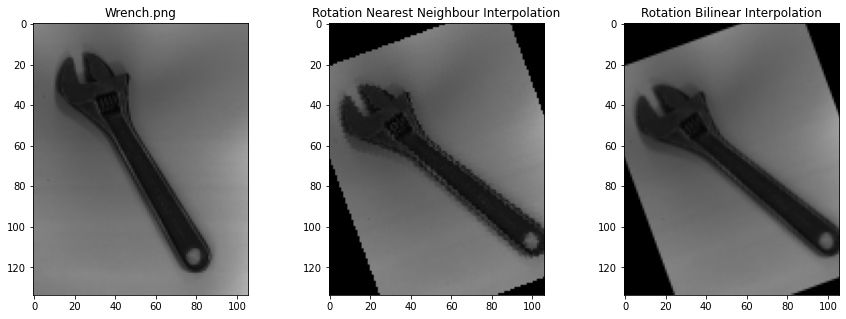

In [49]:
im = cv.imread('./data/wrench.png')
print(f'Wrench.png shape: {im.shape}')

im_rot20_bilinear = rotate_image(im, 20, cv.INTER_LINEAR)
im_rot20_nn = rotate_image(im, 20, cv.INTER_NEAREST)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax0.imshow(im)
ax0.set_title('Wrench.png')
ax1.imshow(im_rot20_nn)
ax1.set_title('Rotation Nearest Neighbour Interpolation')
ax2.imshow(im_rot20_bilinear)
ax2.set_title('Rotation Bilinear Interpolation')